# Homework 1 Part 2

**4.** Download the historical stock price for Citibank (ticker symbol: C) from the Yahoo finance website (https://finance.yahoo.com/quote/C) for the time period between Jan 1, 2000 to Dec 31, 2019. Use the "Download Data" option on the web page to download and save the data into a file named C.csv.

  (a). Load the data into a dataframe object named price.

In [1]:
import pandas as pd

price = pd.read_csv("C.csv")
price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,417.18750,417.18750,390.00000,397.500,332.565002,1681900
1,2000-01-04,390.00000,391.40625,373.12500,373.125,312.171967,2403200
2,2000-01-05,381.56250,390.00000,371.25000,388.125,324.721588,1742500
3,2000-01-06,384.84375,410.15625,384.37500,406.875,340.408417,1863200
4,2000-01-07,405.00000,412.03125,396.09375,405.000,338.839813,1394500


 (b) Plot the time series for the adjusted close price.

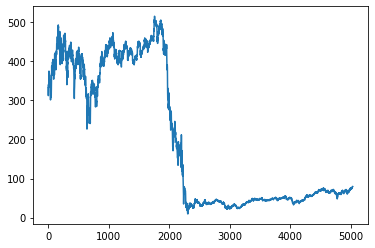

In [2]:
%matplotlib inline
price['Adj Close'].plot(kind='line')

(c) Create a new Series object named diff that contains to the difference between the adjusted closing price of a trading day and the adjusted price of its previous trading day. Next, transform the values into Z-scores by subtracting each value from its mean and dividing by its standard deviation.   

In [3]:
import numpy as np
stockprice = pd.Series(list(price['Adj Close']), index = list(price['Date']))

N = stockprice.size
delta = stockprice[1:].values-stockprice[:N-1].values
diff = pd.Series(delta,index=stockprice[1:].index)

Z_score = (diff - diff.mean())/diff.std()
Z_stockprice = pd.Series(Z_score, index = diff.index)
Z_stockprice

2000-01-04   -4.072440
2000-01-05    2.522402
2000-01-06    3.150444
2000-01-07   -0.303948
2000-01-10   -0.225461
                ...   
2019-12-23    0.060121
2019-12-24   -0.023960
2019-12-26    0.258312
2019-12-27   -0.021958
2019-12-30   -0.021956
Length: 5029, dtype: float64

(d) Identify the dates that correspond to the top-5 outliers in the data. These corresponding to the dates whose adjusted closing price change values with highest absolute Z-score values. Store your answer in a DataFrame object named results, which contains 2 columns (Date and Z-score).

In [4]:
results = pd.DataFrame(Z_stockprice.reindex(Z_stockprice.abs().sort_values(ascending=False).index), columns = ["Z-score"])
results.head()

,Z-score
2002-07-23,-8.459188
2008-10-03,-7.645671
2001-01-03,7.452284
2008-09-19,7.389110
2002-10-15,6.915460


**5.** For this question, you need to write a function that takes two series objects as input, one is quantitative-valued while the other is qualitative, and performs entropy-based discretization on the quantitative-valued series. The number of bins needed is also an input parameter of the function. The function should return a series object containing the discretized values. Apply the function to the dataframe object given below.

In [5]:
import pandas as pd

values = {'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
          'Risk': [0.43, 0.82, 0.56, 0.24, 0.99, 0.14, 0.72, 0.81, 0.26, 0.11, 0.73, 0.86]}

data = pd.DataFrame(values)
data

,Gender,Risk
0,M,0.43
1,F,0.82
2,M,0.56
3,F,0.24
4,M,0.99
5,F,0.14
6,M,0.72
7,F,0.81
8,M,0.26
9,F,0.11


In [6]:
from scipy.stats import entropy

def calcEntropy(classAtrr):
    value,counts = np.unique(classAtrr, return_counts=True)
    return entropy(counts, base=2)

In [7]:
def discretize(qualAttr, classAttr, numBins):
    minval = qualAttr.min()
    maxval = qualAttr.max()
    binstr = '[' + str(minval) + '-' + str(maxval) +']'
    discAttr = pd.Series([binstr for x in qualAttr])
    indices = qualAttr.index
    
    for i in range(1,numBins):
        q = qualAttr.loc[indices]
        c = classAttr.loc[indices]
        
        bestsplit = -1
        bestleftent = bestrightent = best_entropy = 100000
        bestleftindex = bestrightindex = indices
        N = q.shape[0]
        
        for val in q.unique():
            left = c[q <= val]
            left_size = left.shape[0]
            left_ent = calcEntropy(left)   
            right = c[q > val]
            right_size = right.shape[0]
            right_ent = calcEntropy(right)
            total_ent = left_size/N*left_ent + right_size/N*right_ent
            if total_ent < best_entropy:
                best_entropy = total_ent
                bestsplit = val
                bestleftindex = left.index
                bestrightindex = right.index
                bestleftent = left_ent
                bestrightent = right_ent
                discAttr.loc[bestleftindex] = '(' + str(minval) + '-' + str(bestsplit) +']'
                discAttr.loc[bestrightindex] = '(' + str(bestsplit) + '-' + str(maxval) +']'

        if bestleftent >= bestrightent:
            maxval = bestsplit
            indices = bestleftindex
        else:
            minval = bestsplit
            indices = bestrightindex
        
    return discAttr 

In [8]:
data['RiskCategory'] = discretize(data['Risk'],data['Gender'],3)
data

,Gender,Risk,RiskCategory
0,M,0.43,(0.24-0.73]
1,F,0.82,(0.73-0.99]
2,M,0.56,(0.24-0.73]
3,F,0.24,(0.11-0.24]
4,M,0.99,(0.73-0.99]
5,F,0.14,(0.11-0.24]
6,M,0.72,(0.24-0.73]
7,F,0.81,(0.73-0.99]
8,M,0.26,(0.24-0.73]
9,F,0.11,(0.11-0.24]
